In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Step 1: Setup - Download YOLOv3 files if not present
if not os.path.exists("yolov3.weights"):
    os.system("wget https://data.pjreddie.com/files/yolov3.weights")
if not os.path.exists("yolov3.cfg"):
    os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg")
if not os.path.exists("coco.names"):
    os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names")


In [4]:
# Step 2: Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


In [5]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
# Step 3: Load YOLOv3 network
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")


In [7]:
net

< cv2.dnn.Net 0x7c9f5e74ebb0>

In [8]:
# Get names of output layers
layer_names = net.getLayerNames()
try:
    # For OpenCV >= 4.2
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
except:
    # For older OpenCV
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]


In [9]:
layer_names,output_layers

(('conv_0',
  'bn_0',
  'leaky_1',
  'conv_1',
  'bn_1',
  'leaky_2',
  'conv_2',
  'bn_2',
  'leaky_3',
  'conv_3',
  'bn_3',
  'leaky_4',
  'shortcut_4',
  'conv_5',
  'bn_5',
  'leaky_6',
  'conv_6',
  'bn_6',
  'leaky_7',
  'conv_7',
  'bn_7',
  'leaky_8',
  'shortcut_8',
  'conv_9',
  'bn_9',
  'leaky_10',
  'conv_10',
  'bn_10',
  'leaky_11',
  'shortcut_11',
  'conv_12',
  'bn_12',
  'leaky_13',
  'conv_13',
  'bn_13',
  'leaky_14',
  'conv_14',
  'bn_14',
  'leaky_15',
  'shortcut_15',
  'conv_16',
  'bn_16',
  'leaky_17',
  'conv_17',
  'bn_17',
  'leaky_18',
  'shortcut_18',
  'conv_19',
  'bn_19',
  'leaky_20',
  'conv_20',
  'bn_20',
  'leaky_21',
  'shortcut_21',
  'conv_22',
  'bn_22',
  'leaky_23',
  'conv_23',
  'bn_23',
  'leaky_24',
  'shortcut_24',
  'conv_25',
  'bn_25',
  'leaky_26',
  'conv_26',
  'bn_26',
  'leaky_27',
  'shortcut_27',
  'conv_28',
  'bn_28',
  'leaky_29',
  'conv_29',
  'bn_29',
  'leaky_30',
  'shortcut_30',
  'conv_31',
  'bn_31',
  'leaky_32'

In [10]:
# # Step 4: Load input image
# # Download sample image if not present
# if not os.path.exists("sample.jpg"):
#     os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg -O sample.jpg")

image = cv2.imread("himym.jpg")
height, width = image.shape[:2]


In [11]:
height,width

(380, 612)

In [12]:
# Step 5: Convert image to blob and run detection
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)


In [13]:
outputs

(array([[0.03558887, 0.04551063, 0.36032227, ..., 0.        , 0.        ,
         0.        ],
        [0.04566603, 0.03170963, 0.26686457, ..., 0.        , 0.        ,
         0.        ],
        [0.04504246, 0.03727604, 0.79929584, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9520501 , 0.9468019 , 0.50958025, ..., 0.        , 0.        ,
         0.        ],
        [0.9570167 , 0.96005   , 0.32844922, ..., 0.        , 0.        ,
         0.        ],
        [0.965056  , 0.9584601 , 0.84654075, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01905148, 0.02238179, 0.04031081, ..., 0.        , 0.        ,
         0.        ],
        [0.0157166 , 0.01782481, 0.36920163, ..., 0.        , 0.        ,
         0.        ],
        [0.02033897, 0.01731016, 0.06410537, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97669876, 0.9738697 , 0.04329596, ..., 0.        , 0.        ,
         0.        

In [14]:
# Step 6: Parse detections
boxes, confidences, class_ids = [], [], []
conf_threshold, nms_threshold = 0.5, 0.4

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            # Scale bounding box to original image size
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Max Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


In [15]:
indices

array([ 6,  5,  8,  9, 13, 12], dtype=int32)

In [16]:
# Step 7: Draw final bounding boxes
for i in indices.flatten():  # flatten in case indices is [[0], [1], ...]
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = (0, 255, 0)  # Green box
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, color, 2)


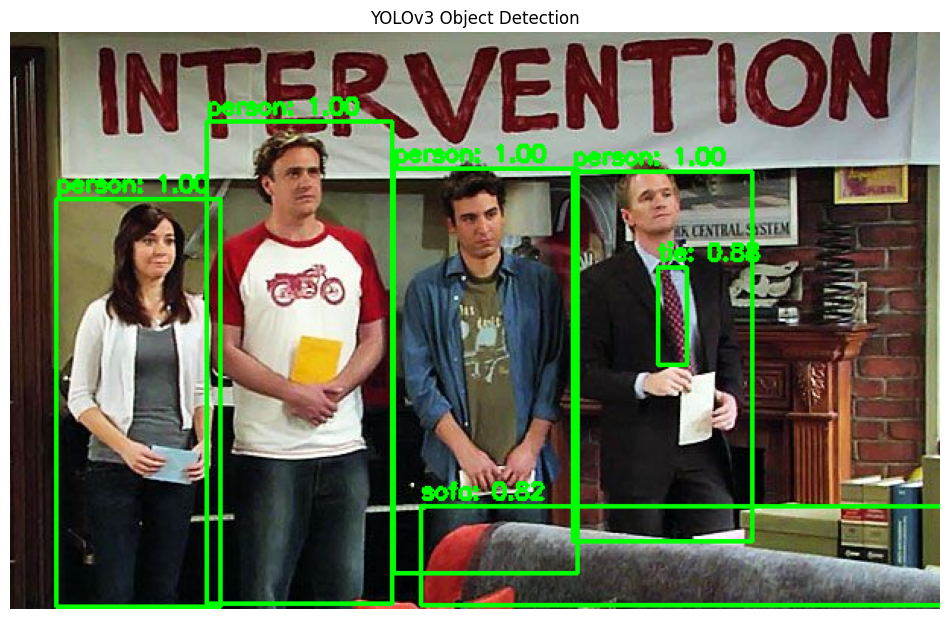

In [17]:
# Step 8: Display the result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("YOLOv3 Object Detection")
plt.show()
